<a href="https://colab.research.google.com/github/joynaomi81/Speech-Emotion-Recognition-/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()  # This will open a file picker for uploading kaggle.json

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"joycenaomice","key":"30c62d22313fe28a7e88d6ff2d686ace"}'}

In [4]:
from google.colab import files
uploaded = files.upload()  # This will open a file picker for uploading kaggle.json

if 'kaggle.json' in uploaded:
    # Move kaggle.json to the correct location
    import os
    os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

    # Set permissions for the API key
    !chmod 600 /root/.kaggle/kaggle.json
else:
    print("Error: kaggle.json not uploaded. Please upload the file.")

Saving kaggle (3).json to kaggle (3) (1).json
Error: kaggle.json not uploaded. Please upload the file.


In [6]:
!kaggle datasets download -d ajaykumar254/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ajaykumar254/toronto-emotional-speech-set-tess
License(s): apache-2.0
 98% 418M/428M [00:09<00:00, 49.5MB/s]
100% 428M/428M [00:09<00:00, 45.1MB/s]


In [7]:
!unzip /content/toronto-emotional-speech-set-tess.zip -d /content/tess_dataset/

Streaming output truncated to the last 5000 lines.
  inflating: /content/tess_dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: /content/tess_dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: /content/tess_dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: /content/tess_dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: /content/tess_dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: /content/tess_dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: /content/tess_dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: /content/tess_dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: /content/tess_dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  infl

In [8]:
import os

# List the contents of the dataset folder
dataset_path = '/content/tess_dataset/'
files = os.listdir(dataset_path)
print(files)


['tess toronto emotional speech set data', 'TESS Toronto emotional speech set data']


In [9]:
# Check if the two directories exist
folder1 = '/content/tess_dataset/tess toronto emotional speech set data'
folder2 = '/content/tess_dataset/TESS Toronto emotional speech set data'

# List contents of both directories
print("Contents of 'tess toronto emotional speech set data':")
print(os.listdir(folder1))

print("\nContents of 'TESS Toronto emotional speech set data':")
print(os.listdir(folder2))


Contents of 'tess toronto emotional speech set data':
['TESS Toronto emotional speech set data']

Contents of 'TESS Toronto emotional speech set data':
['OAF_Pleasant_surprise', 'OAF_angry', 'YAF_pleasant_surprised', 'YAF_angry', 'OAF_Sad', 'OAF_neutral', 'YAF_neutral', 'YAF_fear', 'OAF_disgust', 'OAF_happy', 'OAF_Fear', 'YAF_happy', 'YAF_disgust', 'YAF_sad']


In [10]:
# Assuming folder2 contains the audio data
emotion = 'OAF_happy'  # Change to the emotion you want to analyze
emotion_files = os.listdir(os.path.join(folder2, emotion))

# Check the first few files
print(emotion_files[:5])


['OAF_hire_happy.wav', 'OAF_goal_happy.wav', 'OAF_hall_happy.wav', 'OAF_bath_happy.wav', 'OAF_young_happy.wav']


In [11]:
import os

# Define the paths for the two directories
folder1 = '/content/tess_dataset/tess toronto emotional speech set data'
folder2 = '/content/tess_dataset/TESS Toronto emotional speech set data'

# List contents of both directories
print("Contents of 'tess toronto emotional speech set data':")
print(os.listdir(folder1))

print("\nContents of 'TESS Toronto emotional speech set data':")
print(os.listdir(folder2))


Contents of 'tess toronto emotional speech set data':
['TESS Toronto emotional speech set data']

Contents of 'TESS Toronto emotional speech set data':
['OAF_Pleasant_surprise', 'OAF_angry', 'YAF_pleasant_surprised', 'YAF_angry', 'OAF_Sad', 'OAF_neutral', 'YAF_neutral', 'YAF_fear', 'OAF_disgust', 'OAF_happy', 'OAF_Fear', 'YAF_happy', 'YAF_disgust', 'YAF_sad']


In [12]:
import librosa
import os

# Define the emotion you want to explore (you can replace this with any emotion in the folder)
emotion = 'OAF_happy'  # You can change this to other emotions like 'angry', 'sad', etc.

# List the first 5 audio files in the 'happy' folder
emotion_files = os.listdir(os.path.join(folder2, emotion))
print("First 5 audio files in the 'happy' folder:", emotion_files[:5])

# Load the first audio file
audio_file = emotion_files[0]
audio_path = os.path.join(folder2, emotion, audio_file)

# Load the audio file using librosa
y, sr = librosa.load(audio_path, sr=None)
print(f"Loaded audio: {audio_file}")
print(f"Audio shape: {y.shape}, Sample rate: {sr}")


First 5 audio files in the 'happy' folder: ['OAF_hire_happy.wav', 'OAF_goal_happy.wav', 'OAF_hall_happy.wav', 'OAF_bath_happy.wav', 'OAF_young_happy.wav']
Loaded audio: OAF_hire_happy.wav
Audio shape: (47898,), Sample rate: 24414


In [13]:
import librosa
import os

# Define the emotion you want to explore (you can replace this with any emotion in the folder)
emotion = 'OAF_Sad'  # You can change this to other emotions like 'angry', 'sad', etc.

# List the first 5 audio files in the 'happy' folder
emotion_files = os.listdir(os.path.join(folder2, emotion))
print("First 5 audio files in the 'OAF_Sad' folder:", emotion_files[:5])

# Load the first audio file
audio_file = emotion_files[0]
audio_path = os.path.join(folder2, emotion, audio_file)

# Load the audio file using librosa
y, sr = librosa.load(audio_path, sr=None)
print(f"Loaded audio: {audio_file}")
print(f"Audio shape: {y.shape}, Sample rate: {sr}")


First 5 audio files in the 'OAF_Sad' folder: ['OAF_pain_sad.wav', 'OAF_gun_sad.wav', 'OAF_deep_sad.wav', 'OAF_chair_sad.wav', 'OAF_lot_sad.wav']
Loaded audio: OAF_pain_sad.wav
Audio shape: (59277,), Sample rate: 24414


In [14]:
import os

# Define the path to the dataset
dataset_path = '/content/tess_dataset/TESS Toronto emotional speech set data'

# List the subdirectories (each representing a label)
labels = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Print the labels
print("Labels in the dataset:", labels)


Labels in the dataset: ['OAF_Pleasant_surprise', 'OAF_angry', 'YAF_pleasant_surprised', 'YAF_angry', 'OAF_Sad', 'OAF_neutral', 'YAF_neutral', 'YAF_fear', 'OAF_disgust', 'OAF_happy', 'OAF_Fear', 'YAF_happy', 'YAF_disgust', 'YAF_sad']


In [15]:
import os
import pandas as pd

# Define the path to the dataset
dataset_path = '/content/tess_dataset/TESS Toronto emotional speech set data'

# List the subdirectories (each representing a label)
labels = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Initialize an empty list to store the data
data = []

# Loop through each label
for label in labels:
    label_path = os.path.join(dataset_path, label)

    # Loop through each file in the label folder
    for file in os.listdir(label_path):
        # Only consider files (you can add further filtering if needed, e.g., checking file extension)
        file_path = os.path.join(label_path, file)
        if os.path.isfile(file_path):
            # Extract relevant information (file name and label)
            data.append({
                'file': file,
                'label': label,
                'file_path': file_path
            })

# Convert the list of data into a DataFrame
df = pd.DataFrame(data)

# Add the normalized label counts
label_mapping = {
    "YAF_sad": "sad",
    "OAF_Sad": "sad",
    "OAF_Pleasant_surprise": "pleasant_surprise",
    "YAF_pleasant_surprised": "pleasant_surprise",
    "YAF_fear": "fear",
    "OAF_Fear": "fear",
    "YAF_disgust": "disgust",
    "OAF_disgust": "disgust",
    "YAF_neutral": "neutral",
    "OAF_neutral": "neutral",
    "YAF_happy": "happy",
    "OAF_happy": "happy",
    "YAF_angry": "angry",
    "OAF_angry": "angry",
}

# Create a DataFrame for label counts
label_counts = pd.DataFrame([
    {"label": "YAF_sad", "count": 200},
    {"label": "OAF_Pleasant_surprise", "count": 200},
    {"label": "YAF_fear", "count": 200},
    {"label": "YAF_disgust", "count": 200},
    {"label": "YAF_pleasant_surprised", "count": 200},
    {"label": "OAF_angry", "count": 200},
    {"label": "YAF_neutral", "count": 200},
    {"label": "OAF_happy", "count": 200},
    {"label": "OAF_disgust", "count": 200},
    {"label": "OAF_Sad", "count": 200},
    {"label": "OAF_Fear", "count": 200},
    {"label": "YAF_happy", "count": 200},
    {"label": "YAF_angry", "count": 200},
    {"label": "OAF_neutral", "count": 200},
])

# Add normalized labels to the `df`
df['normalized_label'] = df['label'].map(label_mapping)

# Merge the label counts with the main DataFrame
df = df.merge(label_counts, on='label', how='left')

# Display the updated DataFrame
print(df.head())


               file                  label  \
0   OAF_kill_ps.wav  OAF_Pleasant_surprise   
1   OAF_said_ps.wav  OAF_Pleasant_surprise   
2  OAF_voice_ps.wav  OAF_Pleasant_surprise   
3   OAF_road_ps.wav  OAF_Pleasant_surprise   
4  OAF_sheep_ps.wav  OAF_Pleasant_surprise   

                                           file_path   normalized_label  count  
0  /content/tess_dataset/TESS Toronto emotional s...  pleasant_surprise    200  
1  /content/tess_dataset/TESS Toronto emotional s...  pleasant_surprise    200  
2  /content/tess_dataset/TESS Toronto emotional s...  pleasant_surprise    200  
3  /content/tess_dataset/TESS Toronto emotional s...  pleasant_surprise    200  
4  /content/tess_dataset/TESS Toronto emotional s...  pleasant_surprise    200  


In [16]:
df.head()

,file,label,file_path,normalized_label,count
0,OAF_kill_ps.wav,OAF_Pleasant_surprise,/content/tess_dataset/TESS Toronto emotional s...,pleasant_surprise,200
1,OAF_said_ps.wav,OAF_Pleasant_surprise,/content/tess_dataset/TESS Toronto emotional s...,pleasant_surprise,200
2,OAF_voice_ps.wav,OAF_Pleasant_surprise,/content/tess_dataset/TESS Toronto emotional s...,pleasant_surprise,200
3,OAF_road_ps.wav,OAF_Pleasant_surprise,/content/tess_dataset/TESS Toronto emotional s...,pleasant_surprise,200
4,OAF_sheep_ps.wav,OAF_Pleasant_surprise,/content/tess_dataset/TESS Toronto emotional s...,pleasant_surprise,200


In [17]:
df = df.drop('label', axis=1)

In [18]:
df = df.rename(columns={'normalized_label': 'label'})

In [19]:
df = df.drop('count', axis=1)

In [20]:
df.head()

,file,file_path,label
0,OAF_kill_ps.wav,/content/tess_dataset/TESS Toronto emotional s...,pleasant_surprise
1,OAF_said_ps.wav,/content/tess_dataset/TESS Toronto emotional s...,pleasant_surprise
2,OAF_voice_ps.wav,/content/tess_dataset/TESS Toronto emotional s...,pleasant_surprise
3,OAF_road_ps.wav,/content/tess_dataset/TESS Toronto emotional s...,pleasant_surprise
4,OAF_sheep_ps.wav,/content/tess_dataset/TESS Toronto emotional s...,pleasant_surprise


In [21]:
df.shape

(2800, 3)

In [22]:
df.tail()

,file,file_path,label
2795,YAF_pass_sad.wav,/content/tess_dataset/TESS Toronto emotional s...,sad
2796,YAF_kite_sad.wav,/content/tess_dataset/TESS Toronto emotional s...,sad
2797,YAF_rough_sad.wav,/content/tess_dataset/TESS Toronto emotional s...,sad
2798,YAF_page_sad.wav,/content/tess_dataset/TESS Toronto emotional s...,sad
2799,YAF_which_sad.wav,/content/tess_dataset/TESS Toronto emotional s...,sad


In [23]:
df.label.value_counts()

,count
label,
pleasant_surprise,400
angry,400
sad,400
neutral,400
fear,400
disgust,400
happy,400


<Axes: xlabel='count', ylabel='label'>

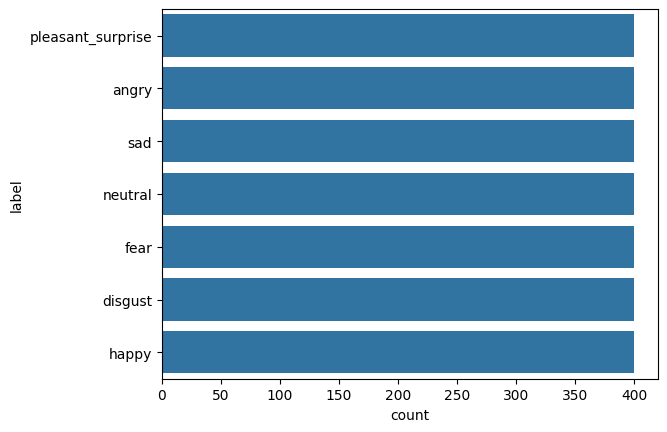

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df.label)

In [25]:
!pip install librosa soundfile matplotlib
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
import os
import pandas as pd
import seaborn as sns

In [26]:
def waveform_plot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    # Use librosa.display.waveshow to display the waveform
    librosa.display.waveshow(data, sr=sr)  # Pass 'data' instead of 'df'
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title(f"Waveform of {emotion}")
    plt.show()

def spectrogram_plot(data, sr, emotion):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()  # Call the colorbar function
    plt.title(f"Spectrogram of {emotion}")  # Added a title for spectrogram
    plt.show()

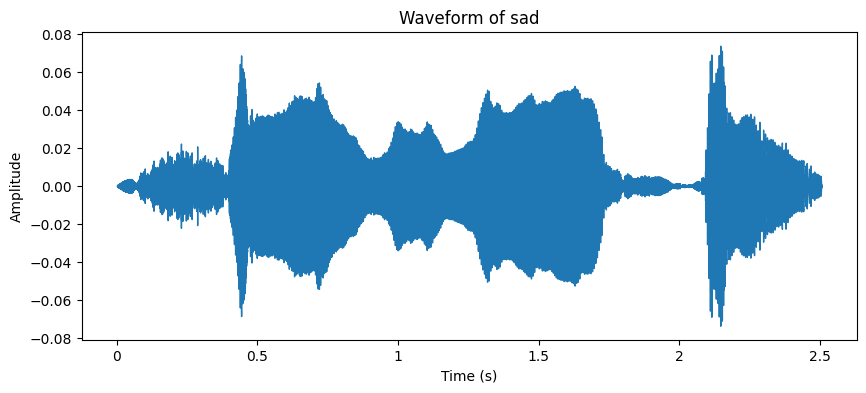

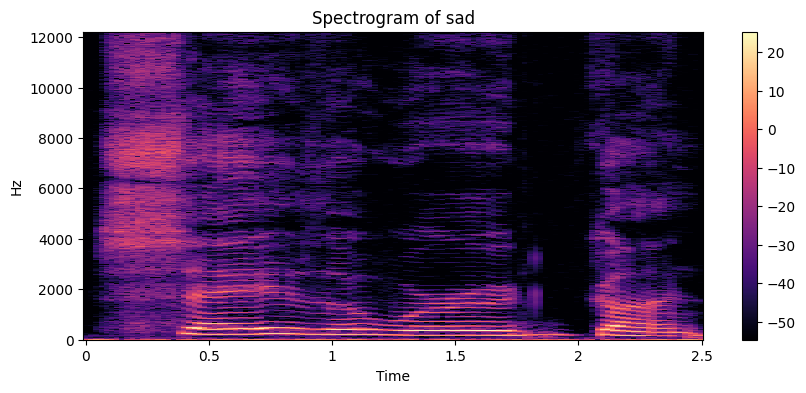

In [27]:
from IPython.display import Audio # Import the Audio object

emotion = 'sad'

# Assuming 'file_path' column contains the full path to the audio files
path = df.loc[df['label'] == emotion, 'file_path'].iloc[1]

try:
    data, sampling_rate = librosa.load(path, sr=None)
    waveform_plot(data, sampling_rate, emotion)
    spectrogram_plot(data, sampling_rate, emotion)
except FileNotFoundError:
    print(f"Error: File not found at path: {path}")
except sf.LibsndfileError as e:  # Changed to sf.LibsndfileError
    print(f"Error loading audio file: {e}")
    print(f"Check if the file is corrupted or in a supported format.")
Audio(path) # Now Audio is defined and should work correctly

## Feature Extraction

In [28]:
def extract_mfcc(filename):
  y,sr = librosa.load(filename, duration = 3, offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [29]:
import numpy as np
extract_mfcc(df['file_path'][0])

array([-4.2215231e+02,  9.6121895e+01,  1.7877840e+01, -2.1484408e+00,
        5.6514800e-01, -8.5230770e+00, -6.0329604e+00,  7.6998396e+00,
       -2.2207548e+01, -3.0489257e-01, -1.5346901e+01, -7.6322756e+00,
       -1.3819606e+00, -6.1225975e-01, -5.6013041e+00,  4.9413228e+00,
       -3.2429874e+00,  8.1021538e+00, -3.2900918e-01,  3.1857046e-01,
        2.2723541e+00, -8.7278301e-01, -1.1528711e+00,  4.5020475e+00,
       -4.2844996e+00,  5.2671971e+00, -3.9368620e+00,  3.7390976e+00,
       -2.8174987e+00,  3.4800892e+00, -1.1138793e+00, -1.4668400e+00,
        1.1218404e+00,  2.6960859e+00,  4.7451606e+00,  1.1549845e+01,
        1.1592614e+01,  1.4462029e+01,  1.2942898e+01,  1.4288740e+01],
      dtype=float32)

In [30]:
X_mfcc = df['file_path'].apply(lambda x: extract_mfcc(x))

In [31]:
X_mfcc

,file_path
0,"[-422.1523, 96.121895, 17.87784, -2.1484408, 0..."
1,"[-417.70337, 83.776596, 17.310097, -7.9614496,..."
2,"[-429.43256, 87.2708, 14.389869, -9.496936, 2...."
3,"[-423.44986, 133.49847, 26.54827, -29.426497, ..."
4,"[-427.23648, 58.043766, 8.2775755, 17.190786, ..."
...,...
2795,"[-396.27527, 68.58253, 29.59831, 22.712044, 6...."
2796,"[-359.99615, 88.42452, 22.534697, 33.94076, -0..."
2797,"[-413.57156, 90.4645, 17.428688, 27.77821, 0.9..."
2798,"[-374.33188, 73.79313, 28.351664, 58.40284, 0...."


In [32]:
X = np.expand_dims(X_mfcc, axis=1)
X.shape

(2800, 1)

In [33]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your labels and transform them
df['label_encoded'] = le.fit_transform(df['label'])

from keras.utils import to_categorical
y = to_categorical(df['label_encoded'])

In [34]:
y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Building the Model

In [35]:
# LSTM
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
model = Sequential([
    LSTM(123, return_sequences= False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 123)                 │          61,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
X = np.stack(X_mfcc.values)

# Reshape X to have the correct dimensions for the LSTM layer
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape to (num_samples, num_features, 1)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=30, batch_size=64, shuffle=True)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.3489 - loss: 1.7207 - val_accuracy: 0.2321 - val_loss: 1.8452
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.6857 - loss: 0.7691 - val_accuracy: 0.4214 - val_loss: 1.5503
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8099 - loss: 0.5007 - val_accuracy: 0.6339 - val_loss: 0.8851
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.8449 - loss: 0.4267 - val_accuracy: 0.6000 - val_loss: 0.9481
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9130 - loss: 0.2643 - val_accuracy: 0.6750 - val_loss: 0.8635
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9338 - loss: 0.2170 - val_accuracy: 0.9018 - val_loss: 0.3398
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9309 - loss: 0.2097 - val_accuracy: 0.8679 - val_loss: 0.4278
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9539 - loss: 0.1621 - val_accuracy: 0.8089 - 

In [39]:
# Predict on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

class_names = df['label'].unique()

print(classification_report(y_true, y_pred_classes, target_names=class_names))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
                   precision    recall  f1-score   support

pleasant_surprise       0.94      1.00      0.97        76
            angry       0.77      0.86      0.81        79
              sad       1.00      1.00      1.00        77
          neutral       1.00      0.94      0.97        80
             fear       1.00      1.00      1.00        96
          disgust       0.85      1.00      0.92        89
            happy       1.00      0.60      0.75        63

         accuracy                           0.93       560
        macro avg       0.94      0.91      0.92       560
     weighted avg       0.94      0.93      0.92       560



In [40]:
from sklearn.metrics import accuracy_score
# Compute accuracy
manual_accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Model Accuracy: {manual_accuracy * 100:.2f}%")

Model Accuracy: 92.68%


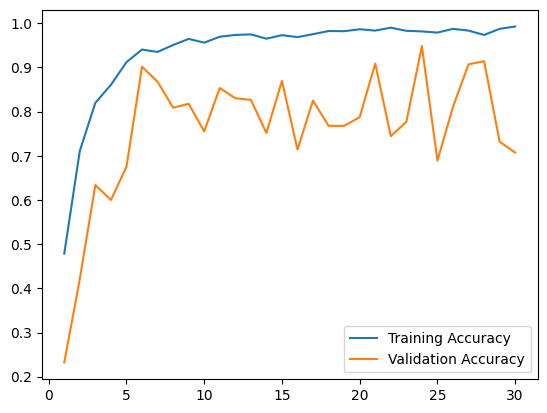

In [41]:
epochs = range(1, 31)  # Create a range of values from 1 to 30
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

# Save Model

In [42]:
import joblib

# Save the model using joblib
joblib.dump(model, 'speech.joblib')
print("Model saved as speech.joblib")


Model saved as speech.joblib


In [43]:
from tensorflow.keras.models import load_model
import joblib


# Save the model to an h5 file
model.save('my_model.h5')
print("Model saved as my_model.h5")


# Load the saved model
loaded_model = load_model('my_model.h5')

Model saved as my_model.h5
